![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Cats Vs Dogs Image Classifier from scratch using Keras: Intro

We are going to train an image classifier from scratch using Keras on the Kaggle Cats vs Dogs dataset.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. References

## Dataset References

1. [Kaggle Cats Vs Dogs Dataset](https://www.kaggle.com/datasets/salader/dogs-vs-cats)
2. [Load Kaggle Dataset in Google Colab](https://buggyprogrammer.com/load-kaggle-dataset-in-colab-or-jupyter/)

## Other References

1. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
3. https://stackoverflow.com/questions/56450969/how-to-calculate-output-sizes-after-a-convolution-layer-in-a-configuration-file
4. https://www.tensorflow.org/api_docs/python/tf/keras/Model


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Load Kaggle Dataset in Google Colab

In [1]:
# Install Kaggle
!pip3 install kaggle

In [2]:
# Upload Kaggle API key (kaggle.json file downloaded from your Kaggle account)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ancilcleetus","key":"21c225043e2abdc810ba33e0243b41e6"}'}

In [3]:
# Move kaggle.json file to .kaggle folder in home directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# Check the permission of the file
!ls -l ~/.kaggle/kaggle.json

-rw------- 1 root root 68 May 28 06:29 /root/.kaggle/kaggle.json


In [4]:
# Get Kaggle Cats Vs Dogs Dataset API Command & Download dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:17<00:00, 168MB/s]
100% 1.06G/1.06G [00:17<00:00, 63.6MB/s]


In [5]:
# Extract dataset zip file
from zipfile import ZipFile
file_name = "dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Installing the required libraries

In [6]:
!pip3 install tensorflow keras numpy matplotlib opencv-python

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Importing packages

In [7]:
import os
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Reading the data

In [8]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

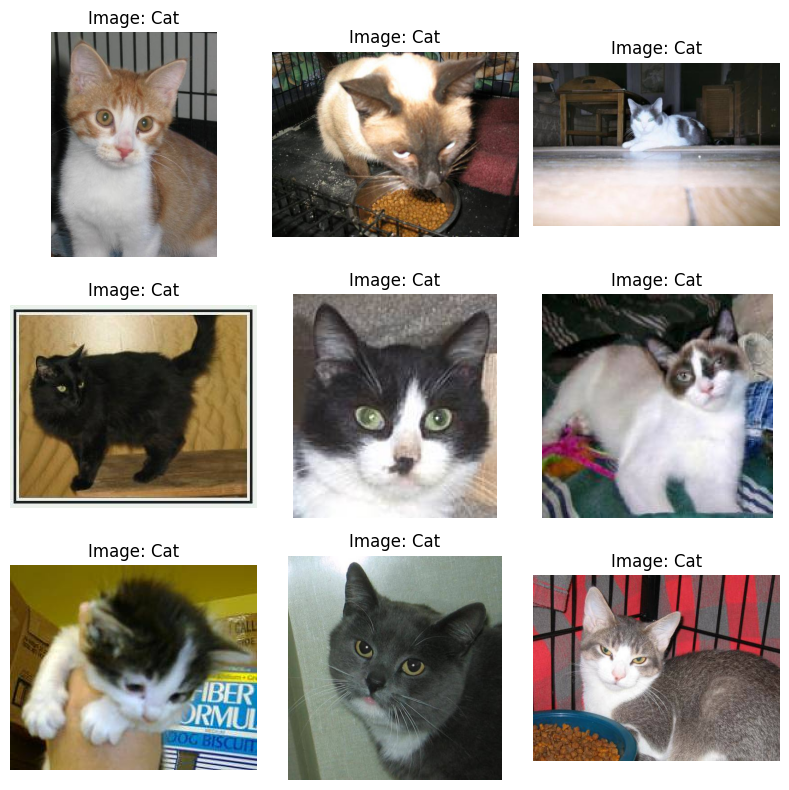

In [9]:
# Plot random cat images
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

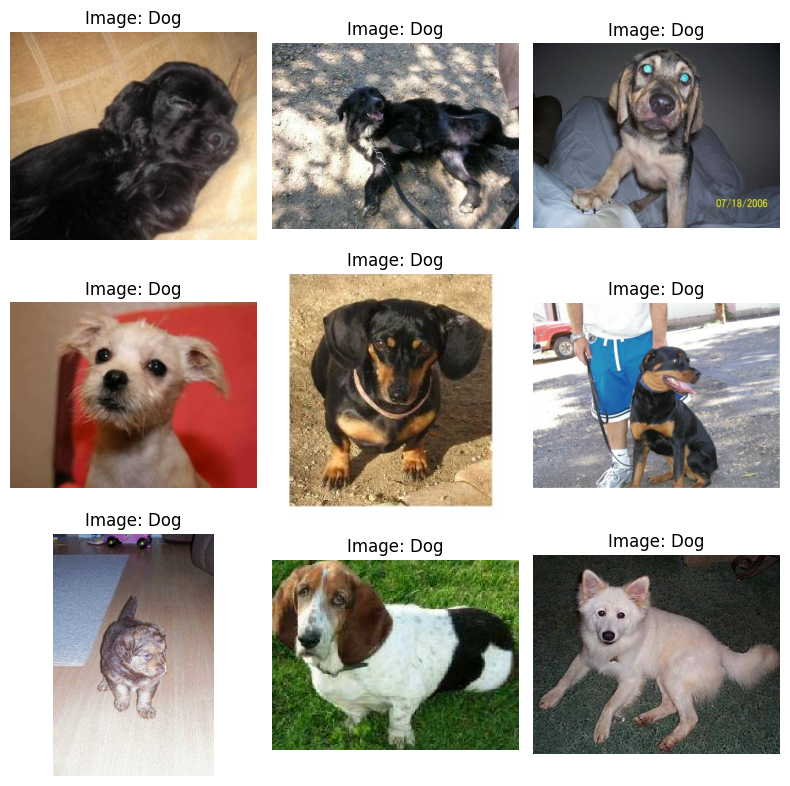

In [10]:
# Plot random dog images
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Data Analysis

In [11]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


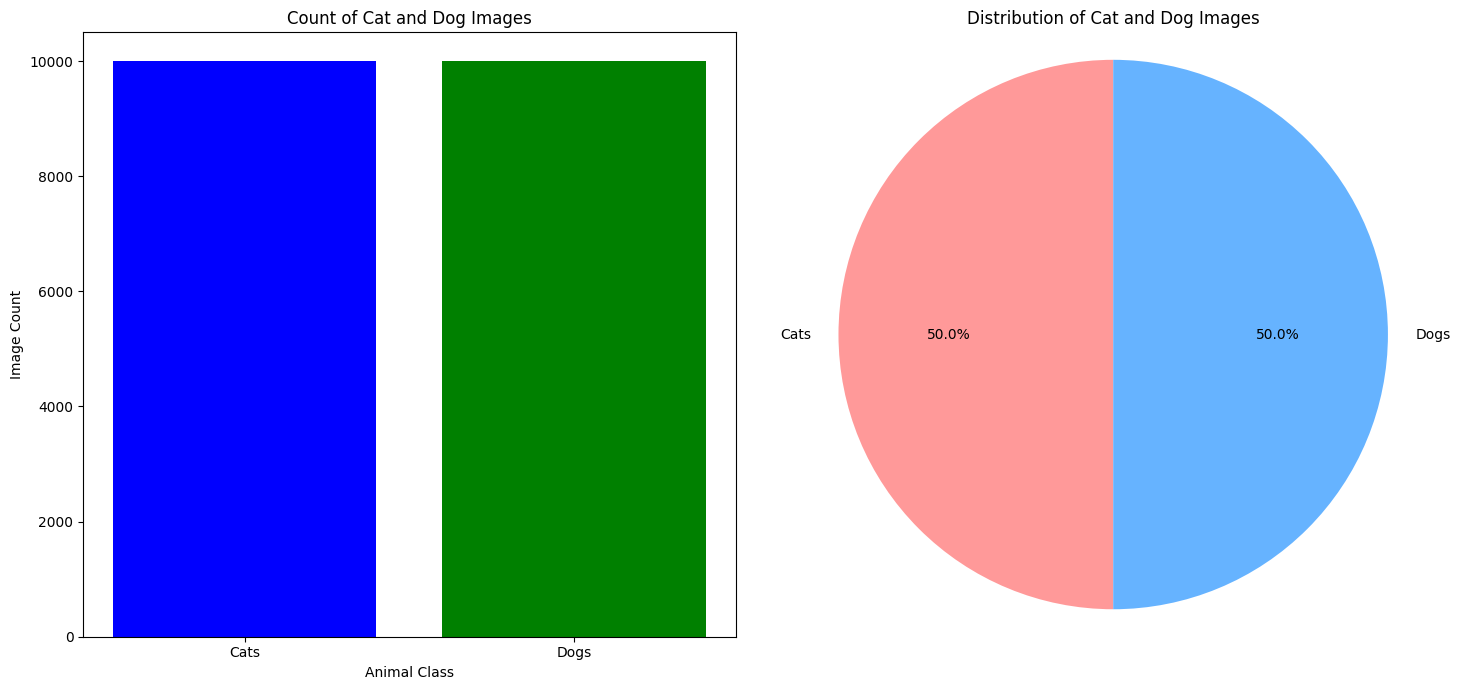

In [12]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

As you can see, we have got a balanced dataset.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 8. Removing corrupted images

We will be doing this step later.

In [ ]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 9. Loading an image as an array

## 1. Using NumPy $\implies$ Array in RGB format

In [13]:
import numpy as np
from PIL import Image

image_path = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'

def image_to_array(image_path):
    """
    Load the image with PIL and convert to a NumPy array

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        return None

img_array = image_to_array(image_path)

# If the image is loaded successfully, print its pixel values
if img_array is not None:
    print(f"img_array.shape: {img_array.shape}")
    print(f"img_array: \n{img_array}")
else:
    print("The image could not be loaded. Please check the path and file permissions.")

img_array.shape: (375, 499, 3)
img_array: 
[[[  9   8   4]
  [ 10  11   6]
  [ 13  13  11]
  ...
  [160 162 183]
  [159 161 184]
  [158 160 183]]

 [[ 17  13  10]
  [ 16  15  11]
  [ 17  17  15]
  ...
  [157 159 180]
  [156 158 181]
  [155 157 180]]

 [[ 17  12   8]
  [ 17  13  10]
  [ 17  16  14]
  ...
  [155 157 178]
  [154 156 179]
  [153 155 178]]

 ...

 [[110  95  88]
  [111  96  89]
  [112  97  90]
  ...
  [128 111 101]
  [128 112  99]
  [128 112  99]]

 [[110  95  88]
  [109  94  87]
  [110  95  88]
  ...
  [129 112 102]
  [129 113 100]
  [129 113 100]]

 [[113  98  91]
  [110  95  88]
  [109  94  87]
  ...
  [125 108  98]
  [125 109  96]
  [125 109  96]]]


## 2. Using OpenCV $\implies$ Array in BGR format

In [14]:
import cv2

image_path = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'
img_array = cv2.imread(image_path)

# If the image is loaded successfully, print its pixel values
if img_array is not None:
    print(f"img_array.shape: {img_array.shape}")
    print(f"img_array: \n{img_array}")
else:
    print("The image could not be loaded. Please check the path and file permissions.")

img_array.shape: (375, 499, 3)
img_array: 
[[[  4   8   9]
  [  6  11  10]
  [ 11  13  13]
  ...
  [183 162 160]
  [184 161 159]
  [183 160 158]]

 [[ 10  13  17]
  [ 11  15  16]
  [ 15  17  17]
  ...
  [180 159 157]
  [181 158 156]
  [180 157 155]]

 [[  8  12  17]
  [ 10  13  17]
  [ 14  16  17]
  ...
  [178 157 155]
  [179 156 154]
  [178 155 153]]

 ...

 [[ 88  95 110]
  [ 89  96 111]
  [ 90  97 112]
  ...
  [101 111 128]
  [ 99 112 128]
  [ 99 112 128]]

 [[ 88  95 110]
  [ 87  94 109]
  [ 88  95 110]
  ...
  [102 112 129]
  [100 113 129]
  [100 113 129]]

 [[ 91  98 113]
  [ 88  95 110]
  [ 87  94 109]
  ...
  [ 98 108 125]
  [ 96 109 125]
  [ 96 109 125]]]


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 10. Building Model

## 1. Load Images using `Keras ImageDataGenerator`

Lets say we have 10000 images of 5 MB each in our dataset. Let our machine has a GPU with 5 GB memory. Since 10000 $\times$ 5 MB = 50 GB > 5 GB, we cannot load all images at once. Hence, we use generators to load images in batches. Lets say we use a batch size of 100. Then, generators load 10000 images in 100 batches of 100 images each. Since 100 $\times$ 5 MB = 0.5 GB < 5 GB, this is feasible.

Here, we use [`Keras ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for loading images in batches. Since our images are inside a directory, we use `flow_from_directory` method of `Keras ImageDataGenerator` to create `train_generator` and `validation_generator`.

In [15]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255 (convert pixel values from [0, 255] to [0, 1]), 20% of data for validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [16]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since Binary Classification (Use 'categorical' for Multi-class Classification)
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## 2. Getting Class Labels

We need to know the labels assigned to cats and dogs by the `Keras ImageDataGenerator`.

In [17]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print(f"Training class labels: {train_class_labels}")

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print(f"Validation class labels: {validation_class_labels}")

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


# X. Creating your dataset & annotating it

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)